# Importing Libraries

In [1]:
import pandas as pd
import gc
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# from sklearn.utils.fixes import signature
from inspect import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing the Data

In [3]:
data = pd.read_csv(r'/content/clothing store dataset.csv')

## Displaying contents in the Dataset

In [4]:
data.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,...,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flag spending AM,flag spending PS,flag spending CC,flag spending AX,flag spending last three months,flag spending last one month,flag spending last six months,flag spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,...,F,T,F,F,F,F,T,T,T,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,F,F,T,F,F,F,F,F,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,...,T,F,T,F,F,F,F,T,T,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,F,F,T,F,T,T,T,F,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,...,F,F,F,F,F,F,F,F,F,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,F,F,T,F,F,F,F,T,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,...,F,T,F,F,F,T,T,T,F,0.0,0.0,29.087111,0.0,10.244023,0.000000,19.335718,12.893797,F,F,T,F,T,F,T,T,4.473009,2.708050,1.732051,3.555348,0.0,3.294354,3.147165,2.449490,F,T,T,10.244023,16.399085,T,T
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0.0,49.0,49.00,0.42,4.0,0.0,8.0,1.0,...,T,F,F,F,F,T,F,F,F,0.0,0.0,9.350936,0.0,9.350936,0.000000,9.350936,0.000000,F,F,T,F,T,F,T,F,3.891820,1.386294,0.000000,2.079442,0.0,3.198673,3.350606,0.000000,F,F,T,9.350936,0.000000,F,T


# EXPLORATORY DATA ANALYSIS

In [5]:
data.RESPONDED.unique()

array([ 0.,  2.,  6.,  3.,  1.,  7.,  5.,  4.,  8., 10.,  9., nan])

In [6]:
data['RESPONDED'].isnull().sum()

1

In [7]:
df = data.dropna()

In [8]:
data.shape

(2847, 119)

In [9]:
df.shape

(2619, 119)

In [10]:
data['RESPONDED'].unique()

array([ 0.,  2.,  6.,  3.,  1.,  7.,  5.,  4.,  8., 10.,  9., nan])

In [11]:
df['RESPONDED'].unique()

array([ 0.,  2.,  6.,  3.,  1.,  7.,  5.,  4.,  8., 10.,  9.])

In [12]:
len(df['RESPONDED'].unique())

11

In [13]:
# store columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns
  
# display columns
print('\nint64 columns:\n',integer_columns)
print('\nfloat64 columns:\n',float_columns)
print('\nobject columns:\n',object_columns)


int64 columns:
 Index(['HHKEY', 'ZIP_CODE', 'REC', 'FRE', 'CC_CARD', 'PC_CALC20'], dtype='object')

float64 columns:
 Index(['MON', 'AVRG', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
       'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS',
       'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND',
       'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND',
       'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN',
       'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'WEB', 'MAILED',
       'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE', 'PERCRET',
       'RESP', 'Tot_Spend', 'Sales per Visit', 'Spending_Month_2_3',
       'Spending_Month_4_5_6', 'bc purchase visits', 'ln total net sales',
       'ln_ave spending per visit', 'sqrt sweaters', 'sqrt knit tops',
       'sqrt knit dresses', 'sqrt blouses', 'sqrt jackets',
       'sqrt career pants', 'sqrt casual pants', 'sqrt shirts', 'sqrt dre

# Visualisation

In [14]:
def plot_count(feature, title,size=1,df=data):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:30], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

In [15]:
def plot_count(feature, title,size=1,df=data):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:30], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


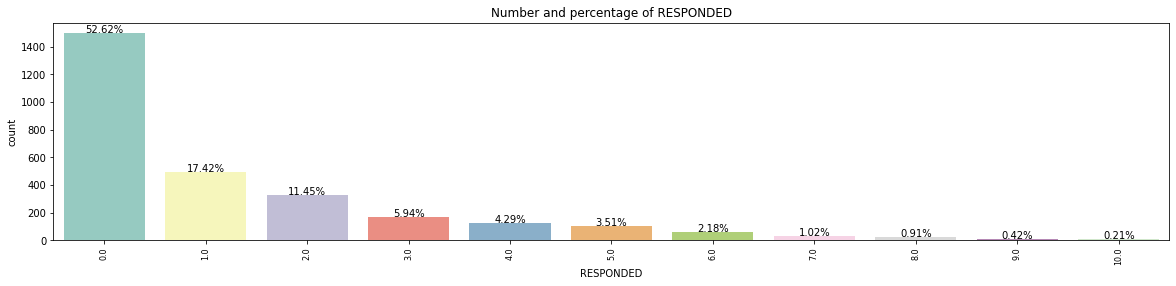

In [16]:
plot_count('RESPONDED','RESPONDED',5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


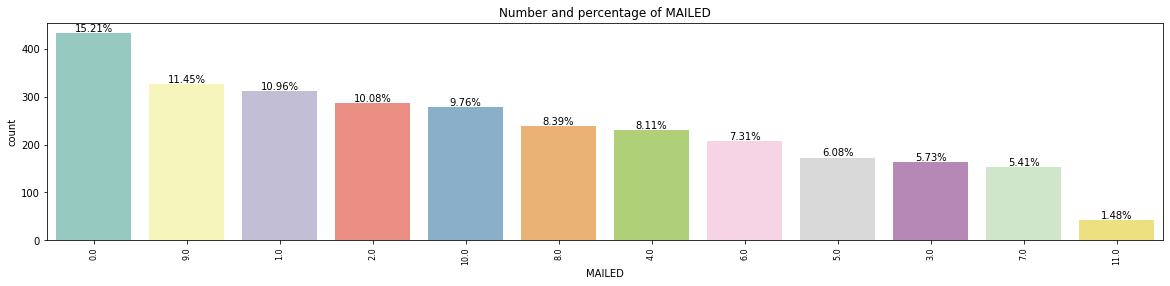

In [17]:
plot_count('MAILED','MAILED',5)

In [18]:
# df.select_dtypes(include=['category'])
cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible

cat_var

['VALPHON',
 'flag sweaters',
 'flag knit tops',
 'flag knit dresses',
 'flag blouses',
 'flag jackets',
 'flag career pants',
 'flag casual pants',
 'flag shirts',
 'flag dresses',
 'flag suits',
 'flag outerwear',
 'flag jewelry',
 'flag fashion',
 'flag legwear',
 'flag collectibles',
 'flag spending AM',
 'flag spending PS',
 'flag spending CC',
 'flag spending AX',
 'flag spending last three months',
 'flag spending last one month',
 'flag spending last six months',
 'flag spending SPLY',
 'flag returns',
 'flag response rate',
 'flag markdown',
 'flag spending months 4 5 6',
 'flag spending months 2 3']

In [19]:
categorical_features = ['VALPHON',
 'flag sweaters',
 'flag knit tops',
 'flag knit dresses',
 'flag blouses',
 'flag jackets',
 'flag career pants',
 'flag casual pants',
 'flag shirts',
 'flag dresses',
 'flag suits',
 'flag outerwear',
 'flag jewelry',
 'flag fashion',
 'flag legwear',
 'flag collectibles',
 'flag spending AM',
 'flag spending PS',
 'flag spending CC',
 'flag spending AX',
 'flag spending last three months',
 'flag spending last one month',
 'flag spending last six months',
 'flag spending SPLY',
 'flag returns',
 'flag response rate',
 'flag markdown',
 'flag spending months 4 5 6',
 'flag spending months 2 3']

In [20]:
def encrypt_single_column(data,column):
    le = preprocessing.LabelEncoder()
    le.fit(data.astype(str))
    #le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
    return le.transform(data.astype(str))


def encrypt_columns_collection(data, columns_to_encrypt):
    for column in columns_to_encrypt:
        data[column] = encrypt_single_column(data[column],column)
    return data

In [21]:
df = encrypt_columns_collection(df, categorical_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,...,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flag spending AM,flag spending PS,flag spending CC,flag spending AX,flag spending last three months,flag spending last one month,flag spending last six months,flag spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,...,0,1,0,0,0,0,1,1,1,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,0,0,1,0.000000,0.000000,0,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,...,1,0,1,0,0,0,0,1,1,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,0,0,0,0,1,1,1,0,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,1,1,1,9.055937,10.954451,1,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,0,0,0,0,0,0,0,1,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,0,0,1,0.000000,0.000000,0,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,...,0,1,0,0,0,1,1,1,0,0.0,0.0,29.087111,0.0,10.244023,0.000000,19.335718,12.893797,0,0,0,0,1,0,1,1,4.473009,2.708050,1.732051,3.555348,0.0,3.294354,3.147165,2.449490,0,1,1,10.244023,16.399085,1,1
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0.0,49.0,49.00,0.42,4.0,0.0,8.0,1.0,...,1,0,0,0,0,1,0,0,0,0.0,0.0,9.350936,0.0,9.350936,0.000000,9.350936,0.000000,0,0,0,0,1,0,1,0,3.891820,1.386294,0.000000,2.079442,0.0,3.198673,3.350606,0.000000,0,0,1,9.350936,0.000000,0,1


In [23]:
df.VALPHON.head()

0    0
1    1
2    0
3    1
4    1
Name: VALPHON, dtype: int64

In [24]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True )

In [25]:
df.columns

Index(['HHKEY', 'ZIP_CODE', 'REC', 'FRE', 'MON', 'CC_CARD', 'AVRG',
       'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS',
       ...
       'ln lifetime ave time betw visits', 'ln product uniformity',
       'sqrt responded', 'flag returns', 'flag response rate', 'flag markdown',
       'sqrt spending months 2 3', 'sqrt spending months 4 5 6',
       'flag spending months 4 5 6', 'flag spending months 2 3'],
      dtype='object', length=119)

In [26]:
print(df.columns.tolist())

['HHKEY', 'ZIP_CODE', 'REC', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP', 'Tot_Spend', 'Sales per Visit', 'Spending_Month_2_3', 'Spending_Month_4_5_6', 'bc purchase visits', 'ln total net sales', 'ln_ave spending per visit', 'sqrt sweaters', 'sqrt knit tops', 'sqrt knit dresses', 'sqrt blouses', 'sqrt jackets', 'sqrt career pants', 'sqrt casual pants', 'sqrt shirts', 'sqrt dresses', 'sqrt suits', 'sqrt outerwear', 'sqrt jewelry', 'sqrt fashion', 'sqrt legwear', 'sqrt collectibles', 'flag sweaters', 'flag k

# FEATURE ENGINEERING

In [27]:
predictors = ['HHKEY', 'ZIP_CODE', 'REC', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'VALPHON', 'WEB', 'MAILED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP', 'Tot_Spend', 'Sales per Visit', 'Spending_Month_2_3', 'Spending_Month_4_5_6', 'bc purchase visits', 'ln total net sales', 'ln_ave spending per visit', 'sqrt sweaters', 'sqrt knit tops', 'sqrt knit dresses', 'sqrt blouses', 'sqrt jackets', 'sqrt career pants', 'sqrt casual pants', 'sqrt shirts', 'sqrt dresses', 'sqrt suits', 'sqrt outerwear', 'sqrt jewelry', 'sqrt fashion', 'sqrt legwear', 'sqrt collectibles', 'flag sweaters', 'flag knit tops', 'flag knit dresses', 'flag blouses', 'flag jackets', 'flag career pants', 'flag casual pants', 'flag shirts', 'flag dresses', 'flag suits', 'flag outerwear', 'flag jewelry', 'flag fashion', 'flag legwear', 'flag collectibles', 'sqrt spending AM', 'sqrt spending PS', 'sqrt spending CC', 'sqrt spending AX', 'sqrt spending last three months', 'sqrt spending last one month', 'sqrt spending last six months', 'sqrt spending SPLY', 'flag spending AM', 'flag spending PS', 'flag spending CC', 'flag spending AX', 'flag spending last three months', 'flag spending last one month', 'flag spending last six months', 'flag spending SPLY', 'ln days between purchases', 'ln # different product classes', 'sqrt # coupons used', 'ln # individual items purchased', 'ln stores', 'ln lifetime ave time betw visits', 'ln product uniformity', 'sqrt responded', 'flag returns', 'flag response rate', 'flag markdown', 'sqrt spending months 2 3', 'sqrt spending months 4 5 6', 'flag spending months 4 5 6', 'flag spending months 2 3']

In [28]:
train_X = train_df[predictors]
test_X = test_df[predictors]
train_y = train_df['RESPONDED']
test_y = test_df['RESPONDED']

In [29]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2095, 118)
(524, 118)
(2095,)
(524,)


In [30]:
y = df['RESPONDED']
X = df.drop('RESPONDED', 1)


In [31]:
X.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,...,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flag spending AM,flag spending PS,flag spending CC,flag spending AX,flag spending last three months,flag spending last one month,flag spending last six months,flag spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,...,0,1,0,0,0,0,1,1,1,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,0,0,1,0.000000,0.000000,0,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,...,1,0,1,0,0,0,0,1,1,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,0,0,0,0,1,1,1,0,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,1,1,1,9.055937,10.954451,1,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,0,0,0,0,0,0,0,1,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,0,0,1,0.000000,0.000000,0,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,...,0,1,0,0,0,1,1,1,0,0.0,0.0,29.087111,0.0,10.244023,0.000000,19.335718,12.893797,0,0,0,0,1,0,1,1,4.473009,2.708050,1.732051,3.555348,0.0,3.294354,3.147165,2.449490,0,1,1,10.244023,16.399085,1,1
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0.0,49.0,49.00,0.42,4.0,0.0,8.0,1.0,...,1,0,0,0,0,1,0,0,0,0.0,0.0,9.350936,0.0,9.350936,0.000000,9.350936,0.000000,0,0,0,0,1,0,1,0,3.891820,1.386294,0.000000,2.079442,0.0,3.198673,3.350606,0.000000,0,0,1,9.350936,0.000000,0,1


In [32]:
print(df.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(2619, 119)
(2619, 118)
XnotNorm  (2619, 118)
ynotNorm  (2619,)


In [33]:
# Normalize X

x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [34]:
# Optimize hyper params for one model
scoring = 'accuracy' 

model = RandomForestClassifier()

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


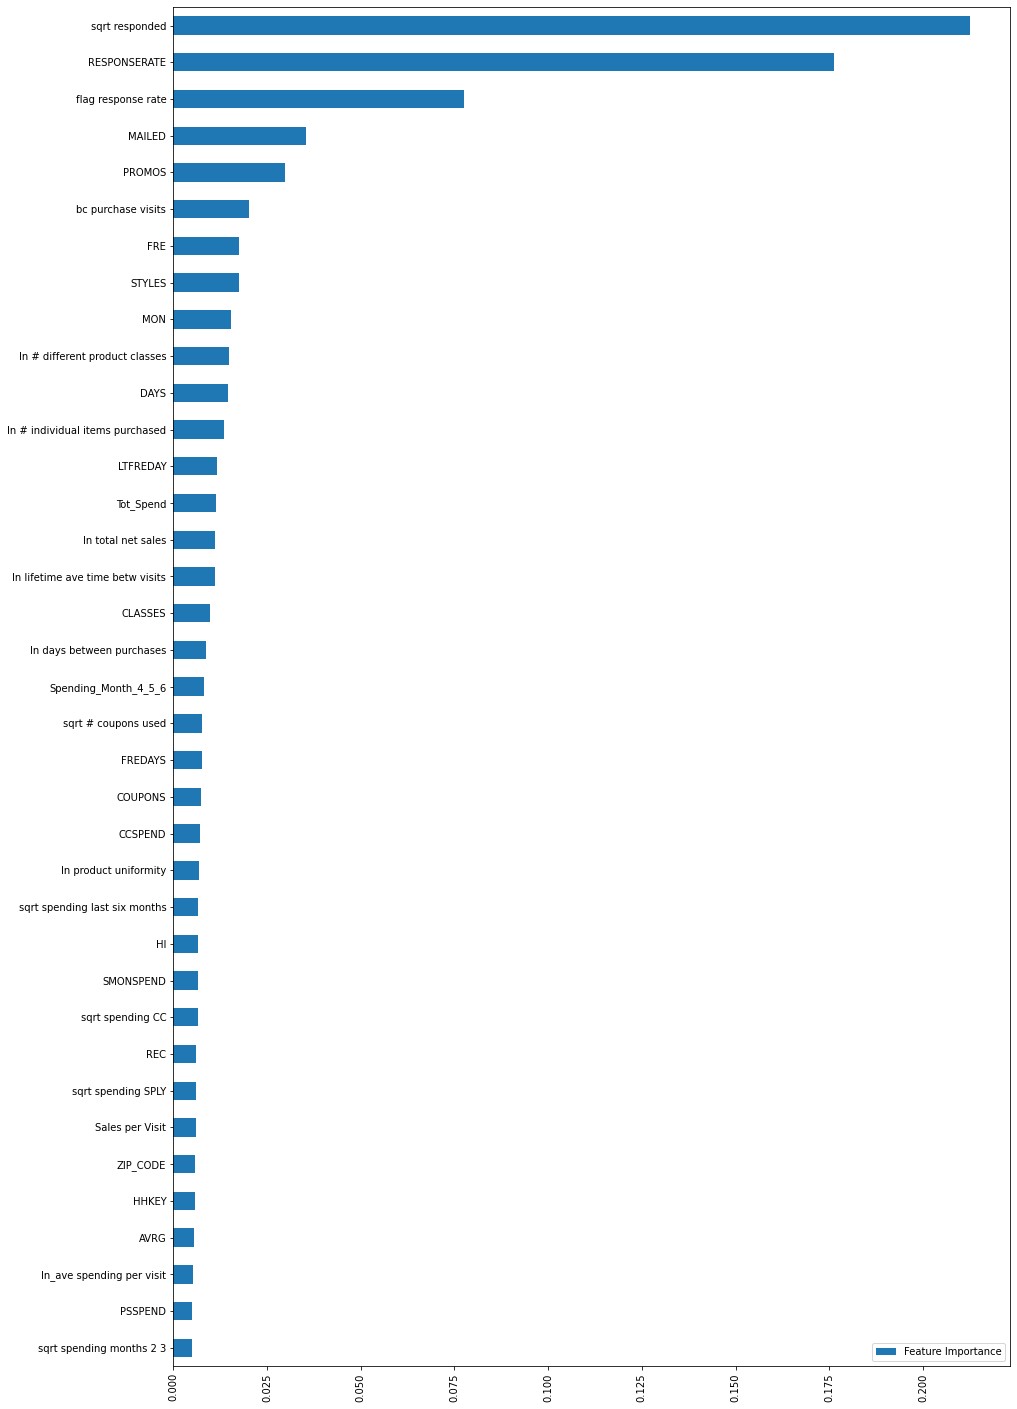

In [35]:
# FEATURE IMPORTANCE - NORMALIZED - last model

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [36]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.006])

                                  Feature Importance
sqrt responded                              0.212687
RESPONSERATE                                0.176328
flag response rate                          0.077492
MAILED                                      0.035393
PROMOS                                      0.029878
bc purchase visits                          0.020298
FRE                                         0.017463
STYLES                                      0.017396
MON                                         0.015516
ln # different product classes              0.014985
DAYS                                        0.014626
ln # individual items purchased             0.013636
LTFREDAY                                    0.011598
Tot_Spend                                   0.011416
ln total net sales                          0.011064
ln lifetime ave time betw visits            0.011048
CLASSES                                     0.009863
ln days between purchases                   0.

In [37]:
imp_features = FI_model[FI_model["Feature Importance"] > 0.006]

In [38]:
imp_features.index

Index(['sqrt responded', 'RESPONSERATE', 'flag response rate', 'MAILED',
       'PROMOS', 'bc purchase visits', 'FRE', 'STYLES', 'MON',
       'ln # different product classes', 'DAYS',
       'ln # individual items purchased', 'LTFREDAY', 'Tot_Spend',
       'ln total net sales', 'ln lifetime ave time betw visits', 'CLASSES',
       'ln days between purchases', 'Spending_Month_4_5_6',
       'sqrt # coupons used', 'FREDAYS', 'COUPONS', 'CCSPEND',
       'ln product uniformity', 'sqrt spending last six months', 'HI',
       'SMONSPEND', 'sqrt spending CC', 'REC', 'sqrt spending SPLY'],
      dtype='object')

# FINALIZED FEATURES

In [39]:
df2 = df[['sqrt responded', 'RESPONSERATE', 'flag response rate', 'PROMOS',
       'MAILED', 'DAYS', 'bc purchase visits', 'ln total net sales', 'MON',
       'ln # individual items purchased', 'STYLES', 'Tot_Spend', 'FRE',
       'LTFREDAY', 'ln lifetime ave time betw visits', 'CLASSES', 'REC',
       'ln # different product classes', 'ln product uniformity', 'FREDAYS',
       'sqrt spending last six months', 'SMONSPEND', 'HI',
       'Spending_Month_4_5_6', 'ln days between purchases',
       'sqrt spending months 4 5 6', 'TMONSPEND', 'sqrt # coupons used',
       'CCSPEND', 'sqrt spending SPLY', 'Sales per Visit','RESPONDED']]

In [40]:
df2.shape

(2619, 32)

In [41]:
df2.head()

,sqrt responded,RESPONSERATE,flag response rate,PROMOS,MAILED,DAYS,bc purchase visits,ln total net sales,MON,ln # individual items purchased,STYLES,Tot_Spend,FRE,LTFREDAY,ln lifetime ave time betw visits,CLASSES,REC,ln # different product classes,ln product uniformity,FREDAYS,sqrt spending last six months,SMONSPEND,HI,Spending_Month_4_5_6,ln days between purchases,sqrt spending months 4 5 6,TMONSPEND,sqrt # coupons used,CCSPEND,sqrt spending SPLY,Sales per Visit,RESPONDED
0,0.000000,0.00,0,17.0,5.0,666.0,0.430964,5.909332,368.46,2.397895,11.0,368.46,2,111.00,4.709530,9.0,208,2.197225,3.459781,333.00,0.000000,0.00,31.81,0.00,5.808142,0.000000,0.00,1.000000,368.46,0.000000,184.2300,0.0
1,1.414214,50.00,1,14.0,4.0,696.0,0.583333,5.552960,258.00,2.639057,14.0,258.00,4,43.50,3.772761,6.0,6,1.791759,3.487987,174.00,16.062378,258.00,32.72,120.00,5.159055,10.954451,138.00,0.000000,258.00,0.000000,64.5000,2.0
2,0.000000,0.00,0,10.0,4.0,343.0,0.430964,4.343805,77.00,0.693147,2.0,77.00,2,68.60,4.228293,1.0,327,0.000000,4.605170,171.50,0.000000,0.00,100.00,0.00,5.144583,0.000000,0.00,0.000000,77.00,6.244998,38.5000,0.0
3,2.449490,66.67,1,24.0,9.0,701.0,0.637204,6.740590,846.06,3.555348,35.0,846.06,8,26.96,3.294354,15.0,66,2.708050,3.147165,87.62,19.335718,373.87,23.27,268.93,4.473009,16.399085,104.94,1.732051,846.06,12.893797,105.7575,6.0
4,0.000000,0.00,0,0.0,0.0,49.0,0.000000,4.470953,87.44,2.079442,8.0,87.44,1,24.50,3.198673,4.0,49,1.386294,3.350606,49.00,9.350936,87.44,28.52,0.00,3.891820,0.000000,87.44,0.000000,87.44,0.000000,87.4400,0.0


# MODEL BUILDING 

In [42]:
y = df2['RESPONDED']
X = df2.drop('RESPONDED', 1)

In [43]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

## SUPPORT VECTOR MACHINES

In [45]:
import sklearn as sk
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X, y)
SVM.predict(X.iloc[460:,:])
svm_m = SVM.predict(X.iloc[460:,:])
round(SVM.score(X,y), 4)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6663

## RANDOM FOREST CLASSIFIER

In [46]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)
RF.predict(X_test)
rf_m = RF.predict(X_test)
round(RF.score(X,y), 4)

0.7549

## LOGISTIC REGRESSOR

In [47]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, y_tr)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.687

## NEURAL NETWORKS CLASSIFIER

In [48]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_tr, y_tr)
NN.predict(X_test)
nn_m = NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

0.4733

## FINALIZED MODEL - RANDOM FOREST CLASSIFIER - 77% ACCURACY

In [49]:

accuracy_score(y_test,rf_m)

0.7786259541984732

In [50]:
confusion_matrix(y_test,rf_m)

array([[360,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  51,  32,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,  23,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,  17,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  14,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,  16,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0]])

In [51]:
print(classification_report(y_test, rf_m))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       360
         1.0       0.66      1.00      0.79       118
         2.0       0.28      0.39      0.32        83
         3.0       0.00      0.00      0.00        31
         4.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00        14
         6.0       0.00      0.00      0.00        17
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         5
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3

    accuracy                           0.78       655
   macro avg       0.18      0.22      0.19       655
weighted avg       0.70      0.78      0.73       655



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
X = df2.drop(columns = ['RESPONDED'])
Y = df2['RESPONDED'].values

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:

arr = RF.predict(X_test)
RF.score(X_test, y_test)

0.7710982658959538

In [55]:
y_test.shape

(865,)

## DATA SET FOR LIFT CHART

In [56]:
data1 = {'Instance': [s for s in range(1, 866)], 'Actual Class': y_test, 'Predicted Class': arr}
df_matrix = pd.DataFrame(data1)

df_matrix

,Instance,Actual Class,Predicted Class
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,2.0,1.0
4,5,3.0,2.0
...,...,...,...
860,861,1.0,1.0
861,862,0.0,0.0
862,863,0.0,0.0
863,864,1.0,1.0


In [57]:
data = df_matrix

In [58]:
sorted_input = pd.DataFrame(columns=['Number of Mails Sent', 'Number of Mails Responded'])

for i in range(len(data)):
    sum = data.loc[i, "Actual Class"]
    for j in range(0, i):
        sum += data.loc[j, "Actual Class"]
    sorted_input = sorted_input.append({'Number of Mails Sent': i + 1, 'Number of Mails Responded': sum}, ignore_index=True)

print(sorted_input)

     Number of Mails Sent  Number of Mails Responded
0                     1.0                        0.0
1                     2.0                        0.0
2                     3.0                        0.0
3                     4.0                        2.0
4                     5.0                        5.0
..                    ...                        ...
860                 861.0                     1021.0
861                 862.0                     1021.0
862                 863.0                     1021.0
863                 864.0                     1022.0
864                 865.0                     1022.0

[865 rows x 2 columns]


In [59]:
shuffled_data = data.iloc[np.random.permutation(data.index)].reset_index(drop=True)

rand_input = pd.DataFrame(columns=['Number of Mails Sent', 'Number of Mails Responded'])

for i in range(len(shuffled_data)):
    sum = shuffled_data.loc[i, "Actual Class"]
    for j in range(0, i):
        sum += shuffled_data.loc[j, "Actual Class"]
    rand_input = rand_input.append({'Number of Mails Sent': i + 1, 'Number of Mails Responded': sum}, ignore_index=True)

print(rand_input)

     Number of Mails Sent  Number of Mails Responded
0                     1.0                        2.0
1                     2.0                        2.0
2                     3.0                        3.0
3                     4.0                       10.0
4                     5.0                       10.0
..                    ...                        ...
860                 861.0                     1018.0
861                 862.0                     1019.0
862                 863.0                     1021.0
863                 864.0                     1022.0
864                 865.0                     1022.0

[865 rows x 2 columns]


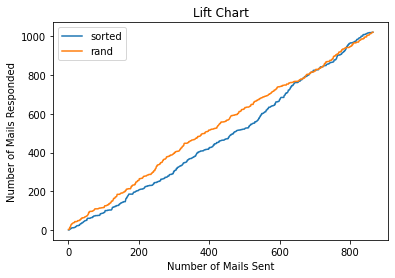

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(sorted_input['Number of Mails Sent'], sorted_input['Number of Mails Responded'], label="sorted")
plt.plot(rand_input['Number of Mails Sent'], rand_input['Number of Mails Responded'], label="rand")
plt.title("Lift Chart")
plt.xlabel('Number of Mails Sent')
plt.ylabel('Number of Mails Responded')
plt.legend()
plt.show()

In [61]:

cost = 4
benefit = 15
cost_benefit_of_mails = pd.DataFrame(columns=['Number of Mails Sent', 'Benefit'])

for i in range(len(data)):
    net_benefit = (15 * sorted_input.loc[i, "Number of Mails Responded"]) - (4 * sorted_input.loc[i, "Number of Mails Sent"])
    cost_benefit_of_mails = cost_benefit_of_mails.append({'Number of Mails Sent': i + 1, 'Benefit': net_benefit}, ignore_index=True)

print(cost_benefit_of_mails)

     Number of Mails Sent  Benefit
0                     1.0     -4.0
1                     2.0     -8.0
2                     3.0    -12.0
3                     4.0     14.0
4                     5.0     55.0
..                    ...      ...
860                 861.0  11871.0
861                 862.0  11867.0
862                 863.0  11863.0
863                 864.0  11874.0
864                 865.0  11870.0

[865 rows x 2 columns]


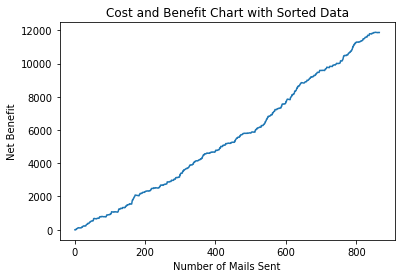

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cost_benefit_of_mails['Number of Mails Sent'], cost_benefit_of_mails['Benefit'])
plt.title("Cost and Benefit Chart with Sorted Data")
plt.xlabel('Number of Mails Sent')
plt.ylabel('Net Benefit')
plt.show()

In [63]:

maxes = cost_benefit_of_mails.max()
print("Maximum Benefit: ", maxes[1])

index = cost_benefit_of_mails.index[cost_benefit_of_mails['Benefit'] == maxes[1]].tolist()
print("Number of mails sent corresponding to maximum benefit: ", index[0] + 1)

Maximum Benefit:  11884.0
Number of mails sent corresponding to maximum benefit:  854


In [64]:
cost = 4
benefit = 15
cost_benefit_of_mails = pd.DataFrame(columns=['Number of Mails Sent', 'Benefit'])

for i in range(len(data)):
    net_benefit = (15 * rand_input.loc[i, "Number of Mails Responded"]) - (4 * rand_input.loc[i, "Number of Mails Sent"])
    cost_benefit_of_mails = cost_benefit_of_mails.append({'Number of Mails Sent': i + 1, 'Benefit': net_benefit}, ignore_index=True)

print(cost_benefit_of_mails)


     Number of Mails Sent  Benefit
0                     1.0     26.0
1                     2.0     22.0
2                     3.0     33.0
3                     4.0    134.0
4                     5.0    130.0
..                    ...      ...
860                 861.0  11826.0
861                 862.0  11837.0
862                 863.0  11863.0
863                 864.0  11874.0
864                 865.0  11870.0

[865 rows x 2 columns]


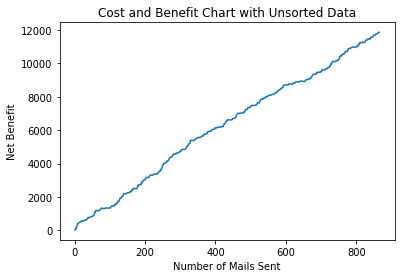

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cost_benefit_of_mails['Number of Mails Sent'], cost_benefit_of_mails['Benefit'])
plt.title("Cost and Benefit Chart with Unsorted Data")
plt.xlabel('Number of Mails Sent')
plt.ylabel('Net Benefit')
plt.show()

# CONCLUSION 

In [66]:
maxes = cost_benefit_of_mails.max()
print("Maximum Benefit: ", maxes[1])

index = cost_benefit_of_mails.index[cost_benefit_of_mails['Benefit'] == maxes[1]].tolist()
print("Number of mails sent corresponding to maximum benefit: ", index[0] + 1)

Maximum Benefit:  11874.0
Number of mails sent corresponding to maximum benefit:  864
